# Libraries

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pivottablejs import pivot_ui

# DataSet

In [2]:
db_data = pd.read_csv("OPENDATA_BOOKING_CARSHARING.csv", sep=';', header=0)
db_data[548069:]

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
548069,46385327,100001,149218,B45F2CFD95C5887698AD87B6596102E24DCCE243,2017-05-16 07:15:07,2017-05-16 07:15:00,2017-05-16 08:15:00,Nein,Ja,NaN,Sredzkistraße,402667,Sredzkistraße,402667,Station,Berlin,Flinkster iPhone
548070,46385351,100001,174116,954FB74EF255E4089D3D7DA3FE6234DE781BFDD3,2017-05-16 07:16:29,2017-05-16 08:30:00,2017-05-16 12:30:00,Nein,Nein,NaN,Bf Köln Messe/Deutz,400755,Bf Köln Messe/Deutz,400755,Station,Köln,Internet
548071,46385778,100001,173552,A986BBFA0F81DD3D2EB02A97A30A97CF111BD2C1,2017-05-16 07:37:19,2017-05-16 08:45:00,2017-05-18 09:45:00,Nein,Nein,NaN,Hbf Saarbrücken,400280,Hbf Saarbrücken,400280,Station,Saarbrücken,Internet
548072,46385814,100012,169106,1127C45D5E5C398FE0BCAF07D6C6694C2C9E0B0B,2017-05-16 07:39:22,2017-05-16 07:45:00,2017-05-16 10:45:00,Nein,Nein,NaN,Hbf Gelsenkirchen,406277,Hbf Gelsenkirchen,406277,Station,Gelsenkirchen,Internet


In [3]:
db_data['TRAVERSE'] = db_data['TRAVERSE_USE'].map({'Nein' : 0 , 'Ja':1}).astype(int)
db_data['EXTRA_BOOKING_FEE']= db_data['COMPUTE_EXTRA_BOOKING_FEE'].map({'Nein': 0 , 'Ja': 1}).astype(int)
#db_data['RENTAL_ZONE_HAL_SRC']= db_data['RENTAL_ZONE_HAL_SRC'].map({'Station': 1}).astype(int)
db_data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet,0,0
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,Station,Stralsund,Internet,0,0
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet,0,0
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN,1,1


In [4]:
db_data['TECHNICAL_INCOME_CHANNEL'].fillna('UNKNOWN', inplace=True)

In [5]:
db_data = db_data[db_data.TECHNICAL_INCOME_CHANNEL != 'UNKNOWN']

In [6]:
db_data['DISTANCE'].fillna('UNKNOWN', inplace=True)

In [7]:
db_data = db_data[db_data.DISTANCE != 'UNKNOWN']

In [8]:
db_data.isnull().sum()

BOOKING_HAL_ID               0
CATEGORY_HAL_ID              0
VEHICLE_HAL_ID               0
CUSTOMER_HAL_ID              0
DATE_BOOKING                 0
DATE_FROM                    0
DATE_UNTIL                   0
COMPUTE_EXTRA_BOOKING_FEE    0
TRAVERSE_USE                 0
DISTANCE                     0
START_RENTAL_ZONE            0
START_RENTAL_ZONE_HAL_ID     0
END_RENTAL_ZONE              0
END_RENTAL_ZONE_HAL_ID       0
RENTAL_ZONE_HAL_SRC          0
CITY_RENTAL_ZONE             0
TECHNICAL_INCOME_CHANNEL     0
TRAVERSE                     0
EXTRA_BOOKING_FEE            0
dtype: int64

In [9]:
db_data.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID               495924
CATEGORY_HAL_ID                  44
VEHICLE_HAL_ID                 1778
CUSTOMER_HAL_ID               52669
DATE_BOOKING                 494142
DATE_FROM                     93781
DATE_UNTIL                   102837
COMPUTE_EXTRA_BOOKING_FEE         2
TRAVERSE_USE                      2
DISTANCE                       1833
START_RENTAL_ZONE               408
START_RENTAL_ZONE_HAL_ID        421
END_RENTAL_ZONE                 408
END_RENTAL_ZONE_HAL_ID          421
RENTAL_ZONE_HAL_SRC               1
CITY_RENTAL_ZONE                 85
TECHNICAL_INCOME_CHANNEL         38
TRAVERSE                          2
EXTRA_BOOKING_FEE                 2
dtype: int64

In [10]:
cartype = pd.read_csv("OPENDATA_VEHICLE_CARSHARING.csv", sep=';', header=0)
columns = ['VEHICLE_MODEL_TYPE','VEHICLE_MODEL_NAME','VEHICLE_TYPE_NAME','VIN','REGISTRATION_PLATE','SERIAL_NUMBER','KW','OWNERSHIP_TYPE','CAPACITY_AMOUNT', 'ACCESS_CONTROL_COMPONENT_TYPE', 'COMPANY', 'COMPANY_GROUP'] 
cartype.drop(columns, inplace=True, axis=1)
cartype.head()
carmerge = pd.merge(db_data, cartype, on ='VEHICLE_HAL_ID')
carmerge.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14,...,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Citroën,Diesel
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0,...,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Citroën,Diesel
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17,...,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Citroën,Diesel
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16,...,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Citroën,Diesel
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16,...,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Citroën,Diesel


In [11]:
carmerge.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID               494528
CATEGORY_HAL_ID                  44
VEHICLE_HAL_ID                 1765
CUSTOMER_HAL_ID               52613
DATE_BOOKING                 492759
DATE_FROM                     93735
DATE_UNTIL                   102790
COMPUTE_EXTRA_BOOKING_FEE         2
TRAVERSE_USE                      2
DISTANCE                       1824
START_RENTAL_ZONE               408
START_RENTAL_ZONE_HAL_ID        420
END_RENTAL_ZONE                 408
END_RENTAL_ZONE_HAL_ID          420
RENTAL_ZONE_HAL_SRC               1
CITY_RENTAL_ZONE                 84
TECHNICAL_INCOME_CHANNEL         38
TRAVERSE                          2
EXTRA_BOOKING_FEE                 2
VEHICLE_MANUFACTURER_NAME        12
FUEL_TYPE_NAME                    6
dtype: int64

In [12]:
catgtype = pd.read_csv("OPENDATA_CATEGORY_CARSHARING.csv", sep=';', header=0)
columns = ['COMPANY','COMPANY_GROUP']
catgtype.drop(columns, inplace=True, axis=1)
catgtype = catgtype.rename(columns={'HAL_ID':'CATEGORY_HAL_ID'})
data_p = pd.merge(carmerge, catgtype, on ='CATEGORY_HAL_ID')
catgtype.head()

,CATEGORY_HAL_ID,CATEGORY
0,100000,Werbeklasse (mit Beklebung)
1,100001,Kleinklasse (teilweise ohne Navi)
2,100002,Mini (teilweise ohne Navi)
3,100003,Kompaktklasse
4,100004,Zubehör


In [13]:
data_p.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID               492613
CATEGORY_HAL_ID                  13
VEHICLE_HAL_ID                 1765
CUSTOMER_HAL_ID               52518
DATE_BOOKING                 490853
DATE_FROM                     93686
DATE_UNTIL                   102728
COMPUTE_EXTRA_BOOKING_FEE         2
TRAVERSE_USE                      2
DISTANCE                       1816
START_RENTAL_ZONE               408
START_RENTAL_ZONE_HAL_ID        420
END_RENTAL_ZONE                 408
END_RENTAL_ZONE_HAL_ID          420
RENTAL_ZONE_HAL_SRC               1
CITY_RENTAL_ZONE                 84
TECHNICAL_INCOME_CHANNEL         38
TRAVERSE                          2
EXTRA_BOOKING_FEE                 2
VEHICLE_MANUFACTURER_NAME        12
FUEL_TYPE_NAME                    6
CATEGORY                         13
dtype: int64

In [14]:
data_p.isnull().sum()

BOOKING_HAL_ID               0
CATEGORY_HAL_ID              0
VEHICLE_HAL_ID               0
CUSTOMER_HAL_ID              0
DATE_BOOKING                 0
DATE_FROM                    0
DATE_UNTIL                   0
COMPUTE_EXTRA_BOOKING_FEE    0
TRAVERSE_USE                 0
DISTANCE                     0
START_RENTAL_ZONE            0
START_RENTAL_ZONE_HAL_ID     0
END_RENTAL_ZONE              0
END_RENTAL_ZONE_HAL_ID       0
RENTAL_ZONE_HAL_SRC          0
CITY_RENTAL_ZONE             0
TECHNICAL_INCOME_CHANNEL     0
TRAVERSE                     0
EXTRA_BOOKING_FEE            0
VEHICLE_MANUFACTURER_NAME    0
FUEL_TYPE_NAME               0
CATEGORY                     0
dtype: int64

In [15]:
population = pd.read_csv("Germany_population_by_city_2015.csv", sep=';', header=0)
population

,CITY_RENTAL_ZONE,POPULATION
0,Aachen,245885
1,Aschaffenburg,68986
2,Augsburg,286374
3,Bayreuth,72148
4,Berlin,3520031
5,Bielefeld,333090
6,Bietigheim-Bissingen,43068
7,Cottbus,99687
8,Deggenhausertal,4243
9,Dillingen,20385


In [16]:
population.apply(lambda x: len(x.unique()))

CITY_RENTAL_ZONE    85
POPULATION          85
dtype: int64

In [17]:
data = pd.merge(data_p, population, on ='CITY_RENTAL_ZONE')
data.head(10)

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME,CATEGORY,POPULATION
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
5,20799880,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:14:54,2014-01-20 17:00:00,2014-01-20 23:45:00,Nein,Nein,15,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
6,20896382,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-11-17 12:42:57,2014-02-04 08:45:00,2014-02-04 10:15:00,Nein,Nein,5,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
7,20896766,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-11-17 13:20:34,2014-01-01 14:30:00,2014-01-01 16:00:00,Nein,Nein,16,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
8,21378191,100012,150359,0FC7F06DDDD951AF7009288F8D4B9060925ED107,2014-01-02 17:54:09,2014-01-03 09:00:00,2014-01-03 22:30:00,Nein,Nein,1001,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
9,21394268,100012,150359,0646C8373257083080F514A1E7B483BE1020D949,2014-01-04 15:07:28,2014-01-04 16:30:00,2014-01-04 17:30:00,Nein,Nein,2,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582


In [18]:
data.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID               492613
CATEGORY_HAL_ID                  13
VEHICLE_HAL_ID                 1765
CUSTOMER_HAL_ID               52518
DATE_BOOKING                 490853
DATE_FROM                     93686
DATE_UNTIL                   102728
COMPUTE_EXTRA_BOOKING_FEE         2
TRAVERSE_USE                      2
DISTANCE                       1816
START_RENTAL_ZONE               408
START_RENTAL_ZONE_HAL_ID        420
END_RENTAL_ZONE                 408
END_RENTAL_ZONE_HAL_ID          420
RENTAL_ZONE_HAL_SRC               1
CITY_RENTAL_ZONE                 84
TECHNICAL_INCOME_CHANNEL         38
TRAVERSE                          2
EXTRA_BOOKING_FEE                 2
VEHICLE_MANUFACTURER_NAME        12
FUEL_TYPE_NAME                    6
CATEGORY                         13
POPULATION                       84
dtype: int64

In [19]:
data['VEHICLE_MANUFACTURER_NAME'].value_counts()

Ford          215770
Citroën       178396
Opel           33460
Toyota         26972
Mercedes       21238
Peugeot         4450
Fiat            4133
VW              2706
MCC             2274
Nissan          2024
Mitsubishi       935
Renault          255
Name: VEHICLE_MANUFACTURER_NAME, dtype: int64

In [20]:
#data['VEHICLE_HAL_ID'].value_counts()

In [21]:
data.describe()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,TRAVERSE,EXTRA_BOOKING_FEE,POPULATION
count,4.926130e+05,492613.000000,492613.000000,492613.000000,492613.000000,492613.000000,492613.000000,4.926130e+05
mean,3.189740e+07,100005.580364,158787.639991,355776.912755,355776.912755,0.190614,0.004846,1.632214e+06
std,7.214651e+06,5.062214,7748.562174,125690.862868,125690.862868,0.392786,0.069441,1.283103e+06
min,1.784220e+07,100001.000000,143031.000000,20.000000,20.000000,0.000000,0.000000,5.600000e+01
25%,2.604031e+07,100001.000000,151335.000000,400657.000000,400657.000000,0.000000,0.000000,6.237380e+05
50%,3.063278e+07,100003.000000,156811.000000,401883.000000,401883.000000,0.000000,0.000000,1.060582e+06
75%,3.720466e+07,100012.000000,163397.000000,402746.000000,402746.000000,0.000000,0.000000,3.520031e+06
max,4.638445e+07,100015.000000,181564.000000,406429.000000,406429.000000,1.000000,1.000000,3.520031e+06


In [22]:
#data.groupby('CUSTOMER_HAL_ID')['BOOKING_HAL_ID'].apply(np.unique)

In [23]:
#data.pivot_table(columns='CUSTOMER_HAL_ID')

In [24]:
#data['START_RENTAL_ZONE'].value_counts()

In [25]:
#db_data['RENTAL_ZONE_HAL_SRC'].value_counts()

In [26]:
#db_data.applymap(lambda x: not x or pd.isnull(x)).sum()

In [27]:
#db_data[['RENTAL_ZONE_HAL_SRC', 'DISTANCE']].plot()

In [28]:
data['TECHNICAL_INCOME_CHANNEL'].value_counts(dropna=False)

Internet                       322139
Flinkster iPhone               101180
Flinkster Android               52153
ICS-Server                       3175
Flinkster Windows                2185
Multicity iPhone                 1967
Broker HAL                       1851
Multicity Android                1406
BwFPS Portal Web                 1172
BwCarsharing iPhone               870
Bahn_de_2                         811
HALAPI Teilauto                   731
BwCarsharing Android              647
Book-n-Drive iPhone               544
Onesto_Bahn                       336
API                               236
Book-n-Drive Android              228
ford2go iPhone                    147
ford2go Android                   144
Scouter 255 Web Praegnanz         133
Scouter 255 iOS 2Denker           121
teilAuto                          120
Ford Carsharing FordPass           61
Scouter 255 Android 2Denker        53
Flinkster Connect                  45
BwFPS Dispo Testzugang             42
Flinkster Dr

In [29]:
#db_data.iloc[:,6:].plot()
#plt.show()
#db_data.isnull().sum()

In [30]:
#db_data[db_data.DISTANCE.isnull()].sort_index()
#0 and NaN vales?

In [31]:
#db_data.loc[db_data['DISTANCE'].isnull()].sum()

data[data['DISTANCE']==0]

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME,CATEGORY,POPULATION
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
14,21413486,100012,150359,AA505C0BA9CE8B02225915690E20F3F64662C615,2014-01-06 21:59:44,2014-01-09 13:45:00,2014-01-09 16:00:00,Nein,Ja,0,...,401768,Station,Köln,Internet,1,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
40,21717064,100012,150359,B38DC9BA3EF8BB7717EA1B1EF91FFECC05D60567,2014-02-08 12:30:08,2014-02-08 19:00:00,2014-02-08 22:00:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
45,21772237,100012,150359,AA505C0BA9CE8B02225915690E20F3F64662C615,2014-02-13 16:58:51,2014-02-20 14:15:00,2014-02-20 18:00:00,Nein,Ja,0,...,401768,Station,Köln,Internet,1,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
57,21944725,100012,150359,B38DC9BA3EF8BB7717EA1B1EF91FFECC05D60567,2014-02-28 16:51:34,2014-02-28 16:45:00,2014-02-28 18:00:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
90,22540008,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-04-08 20:25:29,2014-04-23 15:00:00,2014-04-23 15:45:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
95,22605482,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-04-12 13:38:13,2014-05-31 17:15:00,2014-05-31 18:15:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
180,24069580,100012,150359,2EF3B952FA8F45A0813BBBFEDF9C2AF2B3F52171,2014-06-22 17:51:50,2014-06-22 18:00:00,2014-06-22 21:00:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
189,24378715,100012,150359,B38DC9BA3EF8BB7717EA1B1EF91FFECC05D60567,2014-07-06 12:33:51,2014-07-06 14:00:00,2014-07-06 15:00:00,Nein,Nein,0,...,401768,Station,Köln,Internet,0,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582
321,26634846,100012,150359,AA505C0BA9CE8B02225915690E20F3F64662C615,2014-10-19 10:58:30,2014-11-22 08:00:00,2014-11-23 12:15:00,Nein,Ja,0,...,401768,Station,Köln,Internet,1,0,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),1060582


In [32]:
#db_data[db_data.TECHNICAL_INCOME_CHANNEL.isnull()].sort_index()
#what shold we do with this null values

In [33]:
#db_data.dropna(how='all', inplace = True)
#db_data[548069:]

In [34]:
#nonull = db_data[db_data.TECHNICAL_INCOME_CHANNEL != 'UNKNOWN']
#nonull.head()

In [35]:
data.shape

(492613, 23)

In [36]:
db_data.dropna(how='any').shape

(495924, 19)

In [37]:
data.dropna(subset=['DISTANCE','TECHNICAL_INCOME_CHANNEL' ], how='any').shape

(492613, 23)

In [38]:
db_data.shape

(495924, 19)

# Converting to datetime type

In [39]:
data['DATE_BOOKING'] = pd.to_datetime(data.DATE_BOOKING)
data['DATE_FROM'] = pd.to_datetime(data.DATE_FROM)
data['DATE_UNTIL'] = pd.to_datetime(data.DATE_UNTIL)

In [40]:
data.dtypes

BOOKING_HAL_ID                        int64
CATEGORY_HAL_ID                       int64
VEHICLE_HAL_ID                        int64
CUSTOMER_HAL_ID                      object
DATE_BOOKING                 datetime64[ns]
DATE_FROM                    datetime64[ns]
DATE_UNTIL                   datetime64[ns]
COMPUTE_EXTRA_BOOKING_FEE            object
TRAVERSE_USE                         object
DISTANCE                             object
START_RENTAL_ZONE                    object
START_RENTAL_ZONE_HAL_ID              int64
END_RENTAL_ZONE                      object
END_RENTAL_ZONE_HAL_ID                int64
RENTAL_ZONE_HAL_SRC                  object
CITY_RENTAL_ZONE                     object
TECHNICAL_INCOME_CHANNEL             object
TRAVERSE                              int64
EXTRA_BOOKING_FEE                     int64
VEHICLE_MANUFACTURER_NAME            object
FUEL_TYPE_NAME                       object
CATEGORY                             object
POPULATION                      

In [41]:
data.DATE_BOOKING.max()

Timestamp('2017-05-16 05:01:56')

In [42]:
#for booking date
data['BOOKING_YEAR']= data.DATE_BOOKING.dt.year
data['BOOKING_MONTH']= data.DATE_BOOKING.dt.month
data['BOOKING_WDAY']= data.DATE_BOOKING.dt.weekday

In [43]:
data['BOOKING_QUARTER']= data.DATE_BOOKING.dt.quarter

In [44]:
data['FROM_MONTH']= data.DATE_FROM.dt.month

In [45]:
data['UNTIL_MONTH']= data.DATE_UNTIL.dt.month

In [46]:
data['FROM_WDAY']= data.DATE_FROM.dt.weekday

In [47]:
data['UNTIL_WDAY']= data.DATE_UNTIL.dt.weekday

In [48]:
data.BOOKING_YEAR.value_counts().sort_index()

2013       897
2014    169872
2015    152722
2016    127674
2017     41448
Name: BOOKING_YEAR, dtype: int64

In [49]:
data.DATE_BOOKING.min()

Timestamp('2013-06-05 08:49:33')

In [50]:
data.DATE_FROM.min()

Timestamp('2014-01-01 00:30:00')

In [51]:
data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,CATEGORY,POPULATION,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,BOOKING_QUARTER,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2013,6,2,2,1,1,6,6
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2013,9,6,3,1,1,6,6
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2013,10,5,4,3,3,6,6
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2013,11,6,4,1,1,0,0
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2013,11,6,4,1,1,0,0


In [52]:
data.CITY_RENTAL_ZONE.value_counts()

Berlin                    142583
Köln                       87147
München                    81568
Stuttgart                  33258
Hamburg                    17395
Frankfurt am Main          15708
Mannheim                    8997
Freiburg                    8333
Hannover                    7396
Duisburg                    7228
Karlsruhe                   6019
Essen                       4622
Siegburg                    4200
Ulm                         3436
Aschaffenburg               2877
Saarbrücken                 2818
Heidelberg                  2808
Münster                     2801
Potsdam                     2729
Fulda                       2616
Düsseldorf                  2532
Troisdorf                   2532
Ingolstadt                  2212
Bielefeld                   2191
Offenburg                   2159
Aachen                      2110
Kiel                        2079
Lübeck                      1922
Heilbronn                   1876
Schwerin                    1837
          

In [53]:
#db_data[17:22].plot(subplots=True, figsize=(16, 18));

In [54]:
#one_tenth = db_data.sample(frac = .1, random_state=np.random.randint(10))

In [55]:
#one_tenth.shape

In [56]:
#one_tenth = one_tenth.sort_values(by=['DATE_BOOKING'], ascending=[True])

In [57]:
#one_tenth.head()

In [58]:
#from pd.plotting import autocorrelation_plot

#autocorrelation_plot(db_data['DATE_BOOKING', 'DISTANCE'])

In [59]:
#one_tenth[[4,5,6,9,17,18,19,20,21]].plot(subplots=True, figsize=(16, 18));

In [60]:
#sns.pairplot(db_data["Distance"], kind = "reg");

In [61]:
#g = sns.PairGrid(db_data, vars=["DISTANCE", "BOOKING_MONTH"], hue=["CITY_RENTAL_ZONE"])
#g.map(plt.scatter);

In [62]:
#plt.scatter(db_data['BOOKING_MONTH'], db_data['BOOKING_YEAR'])
#plt.show()

In [63]:
#db_data.groupby(['BOOKING_WDAY', 'BOOKING_MONTH'])['DISTANCE'].mean().plot()


In [64]:
#for title, group in db_data.groupby('BOOKING_YEAR'):
#    group.plot(x='BOOKING_MONTH', y='BOOKING_WDAY', title=title, subplots=True)

In [65]:
#db_data['TECHNICAL_INCOME_CHANNEL'].value_counts(dropna=False)

In [66]:
#db_data['DISTANCE'].fillna(db_data['DISTANCE'].mean, inplace=True)

In [67]:
#db_data[db_data.DISTANCE.isnull()].sort_index()

In [68]:
data.columns

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE',
       'END_RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'CITY_RENTAL_ZONE',
       'TECHNICAL_INCOME_CHANNEL', 'TRAVERSE', 'EXTRA_BOOKING_FEE',
       'VEHICLE_MANUFACTURER_NAME', 'FUEL_TYPE_NAME', 'CATEGORY', 'POPULATION',
       'BOOKING_YEAR', 'BOOKING_MONTH', 'BOOKING_WDAY', 'BOOKING_QUARTER',
       'FROM_MONTH', 'UNTIL_MONTH', 'FROM_WDAY', 'UNTIL_WDAY'],
      dtype='object')

In [69]:
tictype = data.pivot_table(index='TECHNICAL_INCOME_CHANNEL', values=['CUSTOMER_HAL_ID'], aggfunc=lambda x: len(x.unique()))
tictype

,CUSTOMER_HAL_ID
TECHNICAL_INCOME_CHANNEL,
API,3
Bahn_de_2,424
Book-n-Drive Android,81
Book-n-Drive iPhone,202
Broker HAL,1
BwCarsharing Android,174
BwCarsharing WindowsPhone,8
BwCarsharing iPhone,160
BwFPS Dispo Testzugang,34


In [70]:
ticctype = data.pivot_table(index='TECHNICAL_INCOME_CHANNEL', values=['CUSTOMER_HAL_ID','CITY_RENTAL_ZONE'], aggfunc=lambda x: len(x.unique()))
ticctype

,CITY_RENTAL_ZONE,CUSTOMER_HAL_ID
TECHNICAL_INCOME_CHANNEL,,
API,10,3
Bahn_de_2,47,424
Book-n-Drive Android,15,81
Book-n-Drive iPhone,25,202
Broker HAL,45,1
BwCarsharing Android,37,174
BwCarsharing WindowsPhone,8,8
BwCarsharing iPhone,30,160
BwFPS Dispo Testzugang,19,34


In [71]:
data.loc[data['TECHNICAL_INCOME_CHANNEL']=='Broker HAL']

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,CATEGORY,POPULATION,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,BOOKING_QUARTER,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
1874,30432123,100012,151331,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-11 17:36:11,2015-06-13 10:15:00,2015-06-13 22:15:00,Nein,Ja,123,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,3,2,6,6,5,5
2638,30450557,100012,154777,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-12 09:41:05,2015-06-12 13:30:57,2015-06-12 15:15:00,Nein,Ja,98,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,4,2,6,6,4,4
2707,31447995,100012,154777,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-07-19 13:02:43,2015-07-19 13:30:25,2015-07-19 18:45:00,Nein,Ja,38,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,7,6,3,7,7,6,6
3883,30678910,100012,156368,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-21 15:04:21,2015-06-21 15:15:51,2015-06-21 15:30:00,Nein,Ja,0,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,6,2,6,6,6,6
4485,30323651,100012,151227,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-07 19:14:34,2015-06-07 19:15:57,2015-06-07 19:45:00,Nein,Ja,6,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,6,2,6,6,6,6
5404,30483788,100012,150778,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-13 11:29:00,2015-06-14 12:00:57,2015-06-14 16:30:57,Nein,Ja,40,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,5,2,6,6,6,6
5412,30674143,100012,150778,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-21 11:04:57,2015-06-21 12:00:51,2015-06-21 15:30:00,Nein,Ja,40,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,6,2,6,6,6,6
6543,30829095,100012,150335,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-27 10:56:26,2015-06-27 11:15:46,2015-06-27 17:15:46,Nein,Ja,34,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,5,2,6,6,5,5
7935,31234689,100012,154773,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-07-11 11:37:39,2015-07-11 12:00:27,2015-07-11 20:30:27,Nein,Ja,77,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,7,5,3,7,7,5,5
10079,30376528,100012,150966,152A78B158581E3945F87FCBF86AA4F2D7CC5E31,2015-06-09 19:43:11,2015-06-09 20:00:57,2015-06-10 00:00:57,Nein,Ja,79,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2015,6,1,2,6,6,1,2


In [72]:
fueltype = data.pivot_table(index='FUEL_TYPE_NAME', values='VEHICLE_HAL_ID', aggfunc=lambda x: len(x.unique()))
fueltype

,VEHICLE_HAL_ID
FUEL_TYPE_NAME,
Diesel,1218
Erdgas (Nottank: Super),1
"Plug In (Strom, Super)",15
Strom,90
Super (Benzin),350
Super E10,91


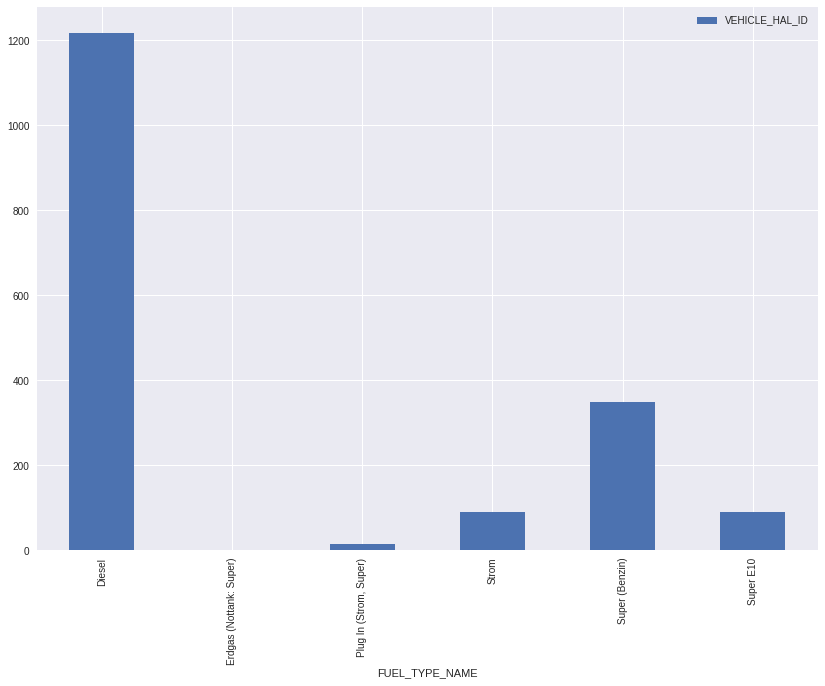

In [73]:
fueltype.plot(kind='bar', figsize=[14,10], stacked=True)

In [74]:
cartype = data.pivot_table(index='VEHICLE_MANUFACTURER_NAME', values=['VEHICLE_HAL_ID','FUEL_TYPE_NAME'], aggfunc=lambda x: len(x.unique()))
cartype

,FUEL_TYPE_NAME,VEHICLE_HAL_ID
VEHICLE_MANUFACTURER_NAME,,
Citroën,2,350
Fiat,2,36
Ford,4,1045
MCC,1,12
Mercedes,1,94
Mitsubishi,1,2
Nissan,1,4
Opel,3,154
Peugeot,3,15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c02740d30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c0fe292b0>], dtype=object)

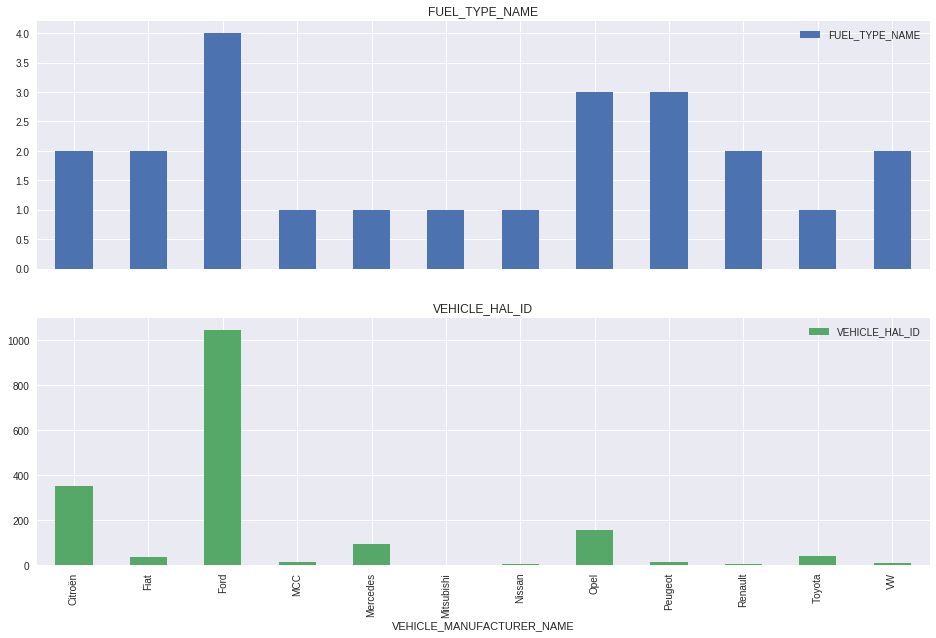

In [75]:
cartype.plot(kind='bar', figsize=[16,10], stacked=True, subplots=True)

In [ ]:
popcity = data.pivot_table()

In [76]:
ccar = data.pivot_table(index='VEHICLE_MANUFACTURER_NAME', values=['FUEL_TYPE_NAME','CUSTOMER_HAL_ID'], aggfunc=lambda x: len(x.unique()))
ccar

,CUSTOMER_HAL_ID,FUEL_TYPE_NAME
VEHICLE_MANUFACTURER_NAME,,
Citroën,26835,2
Fiat,1551,2
Ford,36253,4
MCC,837,1
Mercedes,8766,1
Mitsubishi,155,1
Nissan,64,1
Opel,11738,3
Peugeot,1980,3


In [77]:
ccar.CUSTOMER_HAL_ID.sum()

98110

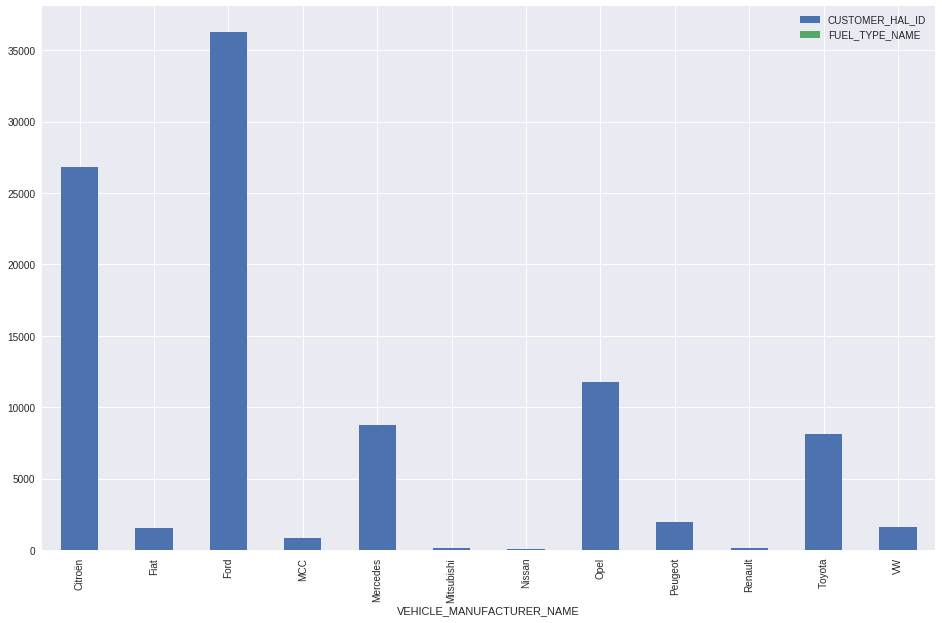

In [78]:
ccar.plot(kind='bar', figsize=[16,10], stacked=True)

In [79]:
ccitycar = data.pivot_table(index='CITY_RENTAL_ZONE', values=['FUEL_TYPE_NAME','CUSTOMER_HAL_ID','VEHICLE_MANUFACTURER_NAME'], aggfunc=lambda x: len(x.unique()))
ccitycar

,CUSTOMER_HAL_ID,FUEL_TYPE_NAME,VEHICLE_MANUFACTURER_NAME
CITY_RENTAL_ZONE,,,
Aachen,567,2,2
Aschaffenburg,489,3,4
Augsburg,399,2,4
Bayreuth,70,1,1
Berlin,14560,5,9
Bielefeld,719,2,3
Bietigheim-Bissingen,106,2,2
Cottbus,117,2,2
Deggenhausertal,5,1,1


In [80]:
ccitycar.CUSTOMER_HAL_ID.sum()

68138

In [147]:
#booking_by_city = db_data.pivot_table(index='CITY_RENTAL_ZONE', values='DISTANCE', aggfunc='count')
#booking_by_city

In [148]:
#booking_by_city.plot(kind='bar', figsize=[16,10], stacked=True)

In [83]:
customer_by_city = data.pivot_table(index='CITY_RENTAL_ZONE', values='CUSTOMER_HAL_ID', aggfunc=lambda x: len(x.unique()))
customer_by_city

,CUSTOMER_HAL_ID
CITY_RENTAL_ZONE,
Aachen,567
Aschaffenburg,489
Augsburg,399
Bayreuth,70
Berlin,14560
Bielefeld,719
Bietigheim-Bissingen,106
Cottbus,117
Deggenhausertal,5


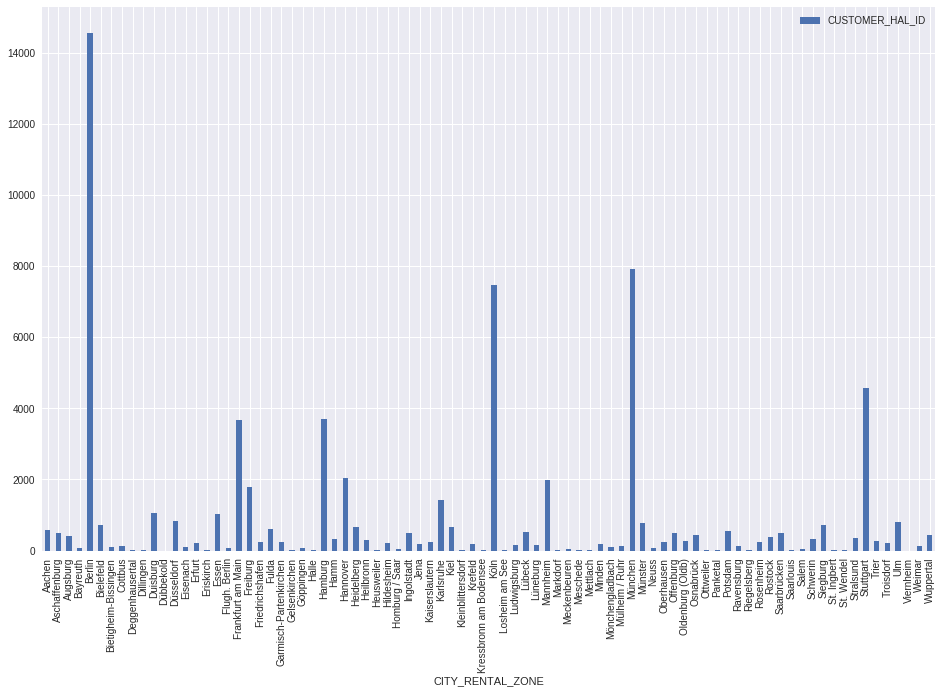

In [84]:
customer_by_city.plot(kind='bar', figsize=[16,10], stacked=True)

In [85]:
#db_data[17:22].plot(subplots=True, figsize=(16, 18))

In [86]:
booking_by_channel = data.pivot_table(index=['TECHNICAL_INCOME_CHANNEL', 'CITY_RENTAL_ZONE'], values='BOOKING_YEAR', aggfunc='count')
booking_by_channel

BOOKING_YEAR
TECHNICAL_INCOME_CHANNEL CITY_RENTAL_ZONE               
API                      Berlin                       68
                         Düsseldorf                    2
                         Frankfurt am Main             4
                         Hamburg                      21
                         Kiel                          1
                         Köln                          5
                         Mannheim                      2
                         München                       3
                         Stuttgart                   126
                         Ulm                           4
Bahn_de_2                Aachen                       16
                         Aschaffenburg                 8
                         Augsburg                      5
                         Berlin                       98
                         Bielefeld                    18
                         Duisburg                     10
                         Düsseldorf                    8
                         Eisenach                      4
                         Erfurt                        2
                         Essen                        41
                         Frankfurt am Main            26
                         Freiburg                     69
                         Fulda                        19
                         Göppingen                     1
                         Hamburg                      57
                         Hamm                          4
                         Hannover                     59
                         Heidelberg                    4
                         Heilbronn                     3
                         Hildesheim                    2
...                                                  ...
einfachMobil iPhone      Mülheim / Ruhr                2
                         München                       8
ford2go Android          Aachen                       20
                         Berlin                        1
                         Duisburg                     15
                         Essen                         8
                         Freiburg                      1
                         Hamm                          1
                         Köln                         71
                         München                       9
                         Oldenburg (Oldb)             10
                         Rosenheim                     7
                         Stuttgart                     1
ford2go iPhone           Berlin                        4
                         Bielefeld                     1
                         Duisburg                      1
                         Freiburg                      4
                         Hamburg                       6
                         Hannover                      1
                         Köln                         65
                         Ludwigsburg                   1
                         München                       8
                         Oldenburg (Oldb)              1
                         Osnabrück                    36
                         Stuttgart                    13
                         Troisdorf                     4
                         Wuppertal                     2
teilAuto                 Erfurt                       30
                         Jena                         58
                         Weimar                       32

[827 rows x 1 columns]

In [87]:
#booking_by_channel.plot(kind='area', figsize=[16,10], stacked=True)

In [88]:
#booking_by_channel.query('TECHNICAL_INCOME_CHANNEL==["UNKNOWN"]')

In [89]:
#day_list = ['BOOKING_WDAY','FROM_WDAY','UNTIL_WDAY']
#booking_by_day = data.pivot_table(index='DATE_BOOKING', values=day_list, aggfunc='sum')
#booking_by_day

In [90]:
#booking_by_day.plot(kind='area', figsize=[16,6], stacked=True)

In [91]:
#month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
#booking_by_month = data.pivot_table(index=['CITY_RENTAL_ZONE','TECHNICAL_INCOME_CHANNEL'], values=month_list, aggfunc='sum')
#booking_by_month

In [92]:
#booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [93]:
#month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
#booking_by_month = data.pivot_table(index='DATE_BOOKING', values=month_list, aggfunc='sum')
#booking_by_month

In [94]:
#booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [95]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = data.pivot_table(index='BOOKING_YEAR', values=month_list, aggfunc='count')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
BOOKING_YEAR,,,
2013,897,897,897
2014,169872,169872,169872
2015,152722,152722,152722
2016,127674,127674,127674
2017,41448,41448,41448


In [96]:
#booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [97]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = data.pivot_table(index='BOOKING_HAL_ID', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
BOOKING_HAL_ID,,,
17842196,6,1,1
18270895,6,5,5
19054992,8,6,6
19057626,8,2,2
19508250,8,5,5
19923967,9,1,1
19960704,9,1,1
19969142,9,1,1
20102722,9,1,1


In [98]:
#booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [99]:
data.columns

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE',
       'END_RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'CITY_RENTAL_ZONE',
       'TECHNICAL_INCOME_CHANNEL', 'TRAVERSE', 'EXTRA_BOOKING_FEE',
       'VEHICLE_MANUFACTURER_NAME', 'FUEL_TYPE_NAME', 'CATEGORY', 'POPULATION',
       'BOOKING_YEAR', 'BOOKING_MONTH', 'BOOKING_WDAY', 'BOOKING_QUARTER',
       'FROM_MONTH', 'UNTIL_MONTH', 'FROM_WDAY', 'UNTIL_WDAY'],
      dtype='object')

In [100]:
#data.loc[data['BOOKING_YEAR'] == 2016]

In [101]:
year = data[(data.BOOKING_YEAR < 2017) & (data.BOOKING_YEAR > 2013)]
year.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,CATEGORY,POPULATION,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,BOOKING_QUARTER,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
8,21378191,100012,150359,0FC7F06DDDD951AF7009288F8D4B9060925ED107,2014-01-02 17:54:09,2014-01-03 09:00:00,2014-01-03 22:30:00,Nein,Nein,1001,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,3,1,1,1,4,4
9,21394268,100012,150359,0646C8373257083080F514A1E7B483BE1020D949,2014-01-04 15:07:28,2014-01-04 16:30:00,2014-01-04 17:30:00,Nein,Nein,2,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,5,1,1,1,5,5
10,21395020,100012,150359,BEF6E7452694AB944BA5E2FADFA107C29D6DC111,2014-01-04 16:23:01,2014-01-04 17:45:00,2014-01-04 18:45:00,Nein,Nein,4,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,5,1,1,1,5,5
11,21404210,100012,150359,B38DC9BA3EF8BB7717EA1B1EF91FFECC05D60567,2014-01-05 23:02:27,2014-01-05 23:15:00,2014-01-06 00:30:00,Nein,Nein,33,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,6,1,1,1,6,0
12,21406248,100012,150359,31A345F78FE6B781182BEFFCA97779712E585472,2014-01-06 09:45:36,2014-01-07 10:00:00,2014-01-07 14:00:00,Nein,Nein,36,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,0,1,1,1,1,1


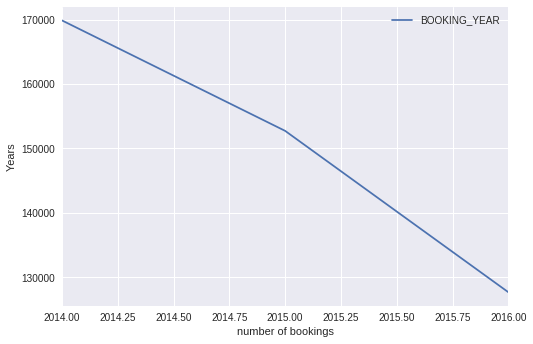

In [102]:
yearb = year.BOOKING_YEAR.value_counts().sort_index().plot(legend=True)
yearb.set_xlabel("number of bookings")
yearb.set_ylabel("Years")

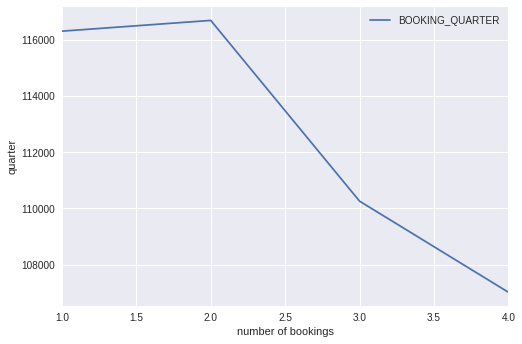

In [103]:
qb = year.BOOKING_QUARTER.value_counts().sort_index().plot(legend=True)
qb.set_xlabel("number of bookings")
qb.set_ylabel("quarter")

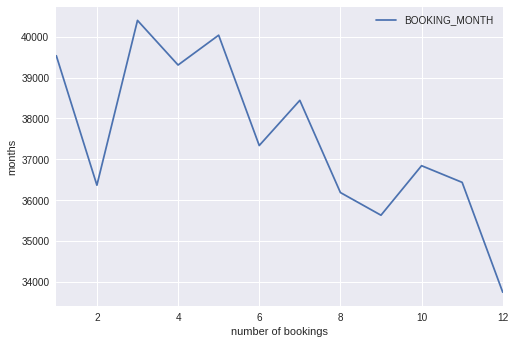

In [104]:
mb = year.BOOKING_MONTH.value_counts().sort_index().plot(legend=True)
mb.set_xlabel("number of bookings")
mb.set_ylabel("months")

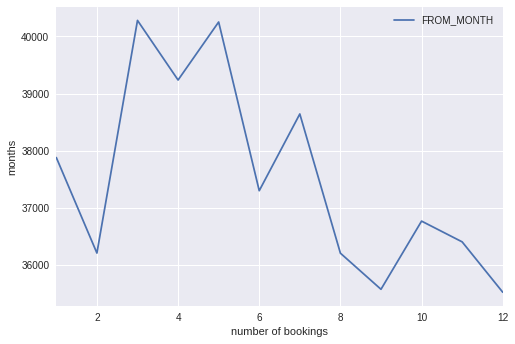

In [105]:
mf = year.FROM_MONTH.value_counts().sort_index().plot(legend=True)
mf.set_xlabel("number of bookings")
mf.set_ylabel("months")

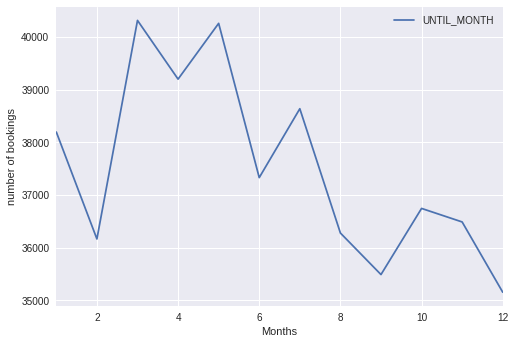

In [106]:
me= year.UNTIL_MONTH.value_counts().sort_index().plot(legend=True)
me.set_xlabel("Months")
me.set_ylabel("number of bookings")

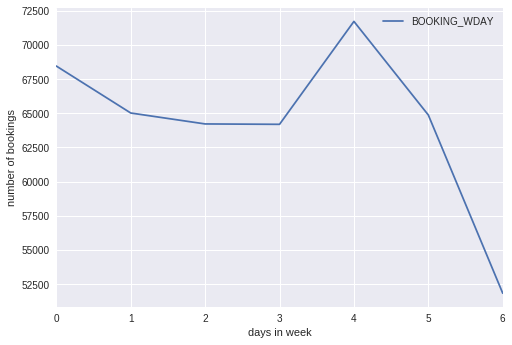

In [107]:
dayB= year.BOOKING_WDAY.value_counts().sort_index().plot(legend=True)
dayB.set_xlabel("days in week")
dayB.set_ylabel("number of bookings")

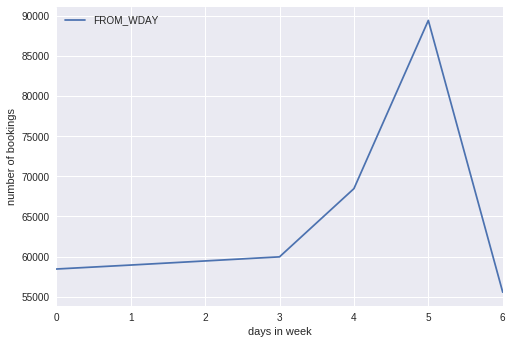

In [108]:
dayS= year.FROM_WDAY.value_counts().sort_index().plot(legend=True)
dayS.set_xlabel("days in week")
dayS.set_ylabel("number of bookings")

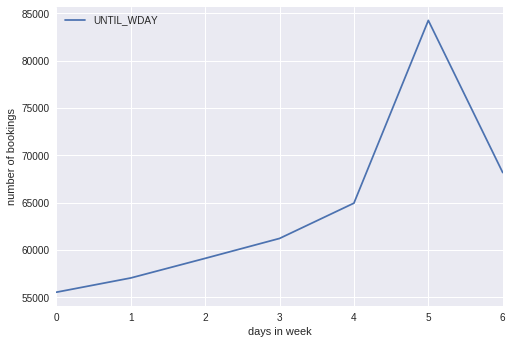

In [109]:
dayE= year.UNTIL_WDAY.value_counts().sort_index().plot(legend=True)
dayE.set_xlabel("days in week")
dayE.set_ylabel("number of bookings")

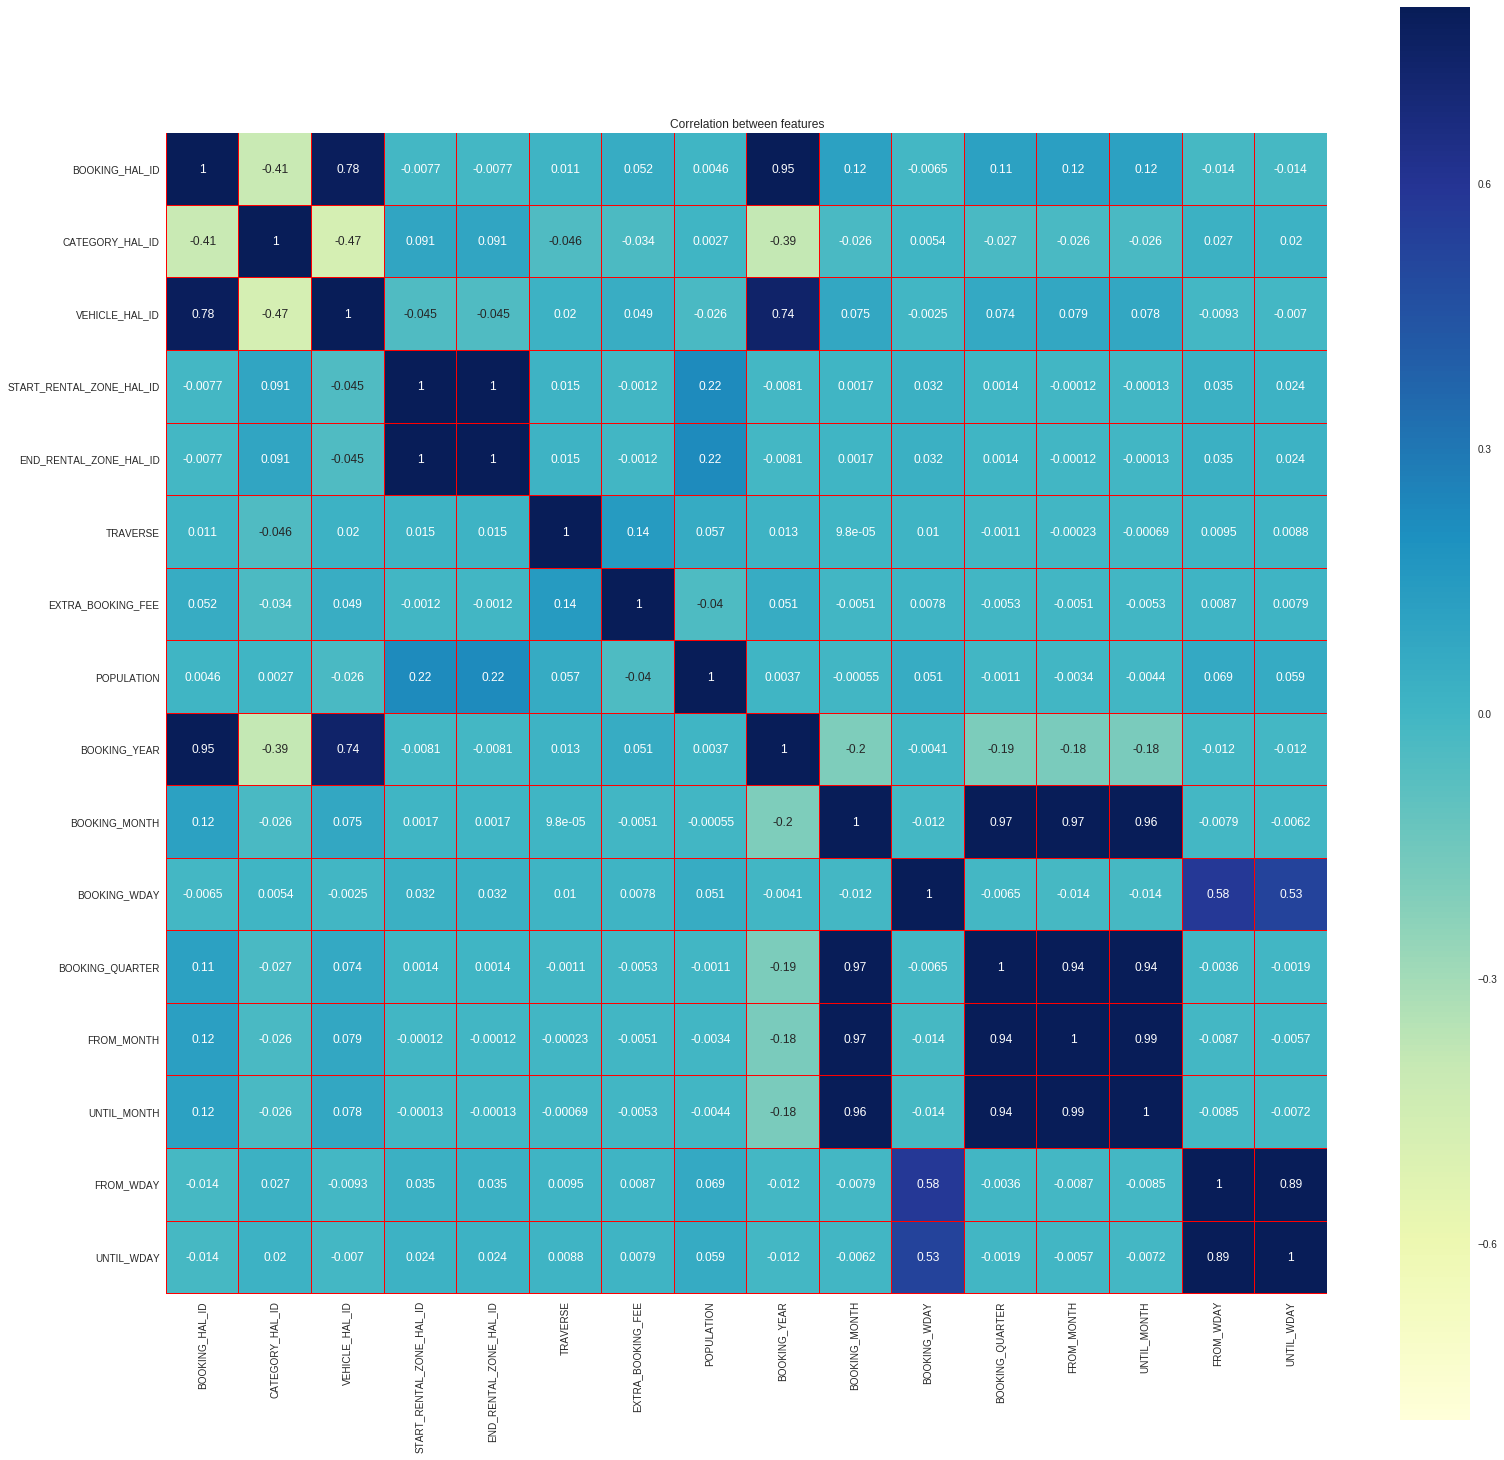

In [110]:
corr=data.corr()
plt.figure(figsize=(26, 26))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="red")
plt.title('Correlation between features');

In [111]:
data.columns

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE',
       'END_RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'CITY_RENTAL_ZONE',
       'TECHNICAL_INCOME_CHANNEL', 'TRAVERSE', 'EXTRA_BOOKING_FEE',
       'VEHICLE_MANUFACTURER_NAME', 'FUEL_TYPE_NAME', 'CATEGORY', 'POPULATION',
       'BOOKING_YEAR', 'BOOKING_MONTH', 'BOOKING_WDAY', 'BOOKING_QUARTER',
       'FROM_MONTH', 'UNTIL_MONTH', 'FROM_WDAY', 'UNTIL_WDAY'],
      dtype='object')

In [232]:
#data.head(10)

In [125]:
Köln = year[year["CITY_RENTAL_ZONE"]=="Köln"]

In [126]:
Köln.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,CATEGORY,POPULATION,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,BOOKING_QUARTER,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
8,21378191,100012,150359,0FC7F06DDDD951AF7009288F8D4B9060925ED107,2014-01-02 17:54:09,2014-01-03 09:00:00,2014-01-03 22:30:00,Nein,Nein,1001,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,3,1,1,1,4,4
9,21394268,100012,150359,0646C8373257083080F514A1E7B483BE1020D949,2014-01-04 15:07:28,2014-01-04 16:30:00,2014-01-04 17:30:00,Nein,Nein,2,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,5,1,1,1,5,5
10,21395020,100012,150359,BEF6E7452694AB944BA5E2FADFA107C29D6DC111,2014-01-04 16:23:01,2014-01-04 17:45:00,2014-01-04 18:45:00,Nein,Nein,4,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,5,1,1,1,5,5
11,21404210,100012,150359,B38DC9BA3EF8BB7717EA1B1EF91FFECC05D60567,2014-01-05 23:02:27,2014-01-05 23:15:00,2014-01-06 00:30:00,Nein,Nein,33,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,6,1,1,1,6,0
12,21406248,100012,150359,31A345F78FE6B781182BEFFCA97779712E585472,2014-01-06 09:45:36,2014-01-07 10:00:00,2014-01-07 14:00:00,Nein,Nein,36,...,Sonderklasse (Alfa MiTo / Citroën DS3),1060582,2014,1,0,1,1,1,1,1


In [149]:
kyear = Köln.pivot_table(index='BOOKING_YEAR', values='BOOKING_HAL_ID', aggfunc=lambda x: len(x.unique()))
kyear

,BOOKING_HAL_ID
BOOKING_YEAR,
2014,34291
2015,26666
2016,20205


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bfd8b5c50>], dtype=object)

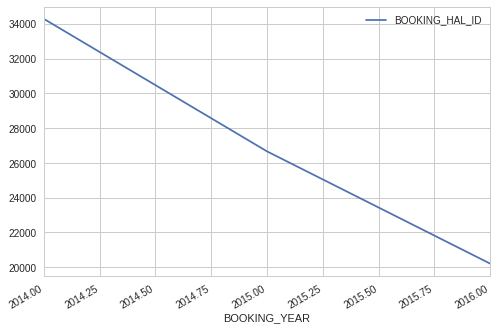

In [151]:
kyear.plot(kind='line', figsize=[16,10], stacked=True, subplots=True)

In [196]:
München = year[year["CITY_RENTAL_ZONE"]=='München']

In [197]:
München

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,CATEGORY,POPULATION,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,BOOKING_QUARTER,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
270237,21366822,100012,150720,BC09B3717A905910E48901E8725B2363F72F4A08,2014-01-01 00:29:18,2014-01-02 06:30:00,2014-01-02 09:00:00,Nein,Ja,16,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,2,1,1,1,3,3
270238,21373088,100012,150720,F9AC0926B84DC65290E1AD48DFE59F7C5271C7D5,2014-01-02 09:26:55,2014-01-02 09:45:00,2014-01-02 12:45:00,Nein,Nein,42,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,3,3
270239,21374117,100012,150720,1893325C9425DE183BC28577A28036F4B76E784E,2014-01-02 11:31:53,2014-01-08 09:30:00,2014-01-08 11:00:00,Nein,Nein,29,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,2,2
270240,21376215,100012,150720,92F9526BCB937B5D0F6D4CD54224E86DBCA23515,2014-01-02 14:47:51,2014-01-04 09:30:00,2014-01-04 20:45:00,Nein,Nein,72,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,5,5
270241,21379703,100012,150720,BC09B3717A905910E48901E8725B2363F72F4A08,2014-01-02 21:25:40,2014-01-09 06:45:00,2014-01-09 09:15:00,Nein,Ja,16,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,3,3
270242,21379705,100012,150720,BC09B3717A905910E48901E8725B2363F72F4A08,2014-01-02 21:26:30,2014-01-10 07:00:00,2014-01-10 09:15:00,Nein,Ja,14,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,4,4
270243,21379710,100012,150720,BC09B3717A905910E48901E8725B2363F72F4A08,2014-01-02 21:27:11,2014-01-12 07:00:00,2014-01-12 11:00:00,Nein,Ja,12,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,6,6
270244,21379714,100012,150720,BC09B3717A905910E48901E8725B2363F72F4A08,2014-01-02 21:27:54,2014-01-12 16:30:00,2014-01-12 18:15:00,Nein,Ja,15,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,3,1,1,1,6,6
270245,21400233,100012,150720,6963D98A29F5A106B65E316EC10486991331D1BF,2014-01-05 13:32:04,2014-01-10 11:15:00,2014-01-10 17:15:00,Nein,Ja,217,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,6,1,1,1,4,4
270246,21400249,100012,150720,6963D98A29F5A106B65E316EC10486991331D1BF,2014-01-05 13:34:03,2014-02-07 11:15:00,2014-02-07 17:45:00,Nein,Ja,220,...,Sonderklasse (Alfa MiTo / Citroën DS3),1450381,2014,1,6,1,2,2,4,4


In [229]:
Münchenyear = München.pivot_table(index='BOOKING_YEAR', values='BOOKING_HAL_ID', aggfunc=lambda x: len(x.unique()))
Münchenyear

,BOOKING_HAL_ID
BOOKING_YEAR,
2014,27120
2015,25554
2016,21896


In [253]:
per_city = data.pivot_table(index=['CITY_RENTAL_ZONE','POPULATION'],values=['BOOKING_HAL_ID','CUSTOMER_HAL_ID','VEHICLE_HAL_ID','START_RENTAL_ZONE'], aggfunc=lambda x: len(x.unique()))
per_city

,,BOOKING_HAL_ID,CUSTOMER_HAL_ID,START_RENTAL_ZONE,VEHICLE_HAL_ID
CITY_RENTAL_ZONE,POPULATION,,,,
Aachen,245885,2110,567,1,10
Aschaffenburg,68986,2877,489,1,11
Augsburg,286374,1694,399,1,12
Bayreuth,72148,130,70,1,1
Berlin,3520031,142583,14560,112,525
Bielefeld,333090,2191,719,1,10
Bietigheim-Bissingen,43068,497,106,1,3
Cottbus,99687,601,117,1,4
Deggenhausertal,4243,894,5,1,1


In [240]:
per_city.reset_index()

,CITY_RENTAL_ZONE,POPULATION,BOOKING_HAL_ID,CUSTOMER_HAL_ID,START_RENTAL_ZONE,VEHICLE_HAL_ID
0,Aachen,245885,2110,567,1,10
1,Aschaffenburg,68986,2877,489,1,11
2,Augsburg,286374,1694,399,1,12
3,Bayreuth,72148,130,70,1,1
4,Berlin,3520031,142583,14560,112,525
5,Bielefeld,333090,2191,719,1,10
6,Bietigheim-Bissingen,43068,497,106,1,3
7,Cottbus,99687,601,117,1,4
8,Deggenhausertal,4243,894,5,1,1
9,Dillingen,20385,6,6,1,1


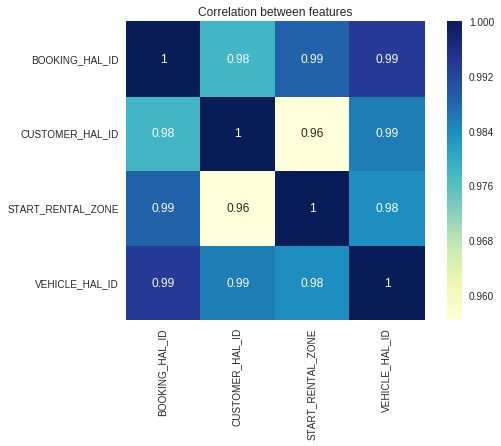

In [241]:
corr=per_city.corr()
sns.heatmap(corr,square=True,annot=True,cmap='YlGnBu',linecolor="red")
plt.title('Correlation between features');

In [231]:
#per_city.plot(kind='line', figsize=[16,10], stacked=True, subplots=True)

In [211]:
per_city.sort_index(by='CUSTOMER_HAL_ID', ascending=False)

/home/jawahar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,,BOOKING_HAL_ID,CUSTOMER_HAL_ID,START_RENTAL_ZONE,VEHICLE_HAL_ID
POPULATION,CITY_RENTAL_ZONE,,,,
3520031,Berlin,142583,14560,112,525
1450381,München,81568,7923,58,288
1060582,Köln,87147,7463,72,252
623738,Stuttgart,33258,4577,37,150
1787408,Hamburg,17395,3710,9,74
732688,Frankfurt am Main,15708,3673,10,63
532163,Hannover,7396,2040,2,36
305780,Mannheim,8997,1985,4,37
226393,Freiburg,8333,1799,1,38


In [256]:
per_city_per_year = data.pivot_table(index=['POPULATION','CITY_RENTAL_ZONE'],columns='BOOKING_YEAR',values=['BOOKING_HAL_ID','CUSTOMER_HAL_ID','VEHICLE_HAL_ID','START_RENTAL_ZONE'], aggfunc=lambda x: len(x.unique()))
per_city_per_year

BOOKING_HAL_ID                             \
BOOKING_YEAR                                2013     2014     2015     2016   
POPULATION CITY_RENTAL_ZONE                                                   
56         Dübbekold                         1.0     21.0     19.0     15.0   
120        Flugh. Berlin                     6.0    114.0      NaN      NaN   
4243       Deggenhausertal                   NaN      NaN    238.0    611.0   
4815       Eriskirch                         NaN      NaN     26.0      8.0   
8487       Kressbronn am Bodensee            NaN      NaN     44.0     27.0   
11053      Kleinblittersdorf                 NaN      3.0      NaN      NaN   
11265      Salem                             NaN     19.0    109.0     65.0   
12209      Mettlach                          NaN      5.0      NaN      NaN   
13265      Meckenbeuren                      NaN    179.0    400.0    347.0   
13811      Markdorf                          NaN      NaN     49.0     23.0   
14571      Ottweiler                         NaN      8.0      NaN      NaN   
14763      Riegelsberg                       NaN      7.0      NaN      NaN   
16023      Losheim am See                    NaN     36.0      1.0      NaN   
18201      Heusweiler                        NaN      3.0      NaN      NaN   
20131      Panketal                          NaN    268.0    195.0      NaN   
20385      Dillingen                         NaN      6.0      NaN      NaN   
25581      Garmisch-Partenkirchen            2.0    320.0    366.0    182.0   
26106      St. Wendel                        NaN      6.0      NaN      NaN   
30081      Meschede                          NaN      3.0     28.0    100.0   
34100      Viernheim                         NaN      NaN      1.0      NaN   
36069      St. Ingbert                       NaN     88.0      7.0      NaN   
41034      Siegburg                         36.0   1522.0   1319.0    969.0   
42040      Homburg / Saar                    NaN    107.0    121.0      8.0   
42588      Eisenach                          NaN    101.0    102.0     65.0   
43068      Bietigheim-Bissingen              2.0    145.0    169.0    120.0   
50095      Ravensburg                        2.0    439.0     56.0      NaN   
56904      Göppingen                         1.0    132.0     79.0    156.0   
58041      Stralsund                         4.0    243.0    225.0    237.0   
58465      Offenburg                        12.0    616.0    625.0    652.0   
59108      Friedrichshafen                   NaN    174.0    858.0    523.0   
...                                          ...      ...      ...      ...   
178151     Saarbrücken                       2.0   1033.0    887.0    683.0   
179397     Hamm                              3.0    325.0    341.0    348.0   
196609     Saarlouis                         NaN     21.0      2.0      NaN   
206011     Rostock                           2.0    356.0    396.0    351.0   
210118     Erfurt                            NaN    168.0    195.0     99.0   
210934     Oberhausen                        1.0    218.0    267.0    208.0   
216253     Lübeck                            9.0    524.0    658.0    531.0   
225144     Krefeld                           1.0    193.0    161.0    328.0   
226393     Freiburg                         11.0   2887.0   2733.0   2017.0   
236991     Halle                             NaN     27.0      2.0     15.0   
245885     Aachen                            8.0    690.0    548.0    629.0   
246306     Kiel                              3.0    615.0    619.0    657.0   
259996     Mönchengladbach                   1.0    185.0    168.0      7.0   
262528     Gelsenkirchen                     NaN      NaN      NaN      NaN   
286374     Augsburg                          6.0   1647.0     41.0      NaN   
305780     Mannheim                         19.0   2958.0   2908.0   2307.0   
307755     Karlsruhe                         8.0   1772.0   1823.0   1763.0   
31003

In [258]:
#pivot_ui(per_city_per_year)

In [247]:
#pivot_ui(Münchenyear)

In [254]:
pivot_ui(per_city)